In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.utils import to_categorical
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
import shutil

# บีบอัดโฟลเดอร์
shutil.make_archive("Chromagram", 'zip', "Chromagram")

'/content/Chromagram.zip'

Class

In [ ]:
# Path to the root folder containing MP3s
input_folder = 'Source'
output_folder = 'Mel Spectrogram'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [ ]:
# Function to create
def create_mel_spectrogram(input_file, output_file):
    try:
        # Load audio file
        y, sr = librosa.load(input_file, sr=None)  # Load with original sampling rate

        # Compute Mel Spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)  # Convert to dB scale

        # Plot Mel Spectrogram and save as image
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mel_spectrogram_db, sr=sr, hop_length=512, x_axis=None, y_axis=None, cmap='magma')

        # Remove all visual elements
        plt.axis('off')  # Turn off axis, ticks, and labels
        plt.tight_layout()
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"Error processing {input_file}: {e}")

In [ ]:
# Process each label folder
for label in os.listdir(input_folder):
    label_path = os.path.join(input_folder, label)
    if os.path.isdir(label_path):
        # Create output subfolder for the label
        label_output_path = os.path.join(output_folder, label)
        if not os.path.exists(label_output_path):
            os.makedirs(label_output_path)

        # Process each audio file in the label folder
        for file_name in tqdm(os.listdir(label_path), desc=f"Processing {label}"):
            if file_name.endswith(".mp3"):
                input_file = os.path.join(label_path, file_name)
                output_file = os.path.join(label_output_path, os.path.splitext(file_name)[0] + ".png")
                create_mel_spectrogram(input_file, output_file)

print("\nMel Spectrogram generation complete!")

Processing Angry: 100%|██████████| 100/100 [00:58<00:00,  1.72it/s]
Processing .ipynb_checkpoints: 0it [00:00, ?it/s]


Mel Spectrogram generation complete!


In [ ]:
# Path to the root folder containing MP3s
input_folder = 'Source'
output_folder = 'MFCC'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [ ]:
# Function to generate and save MFCC
def create_mfcc(audio_path, save_path):
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=None)

        # Generate MFCCs
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract 13 MFCCs (common standard)

        # Create and save the MFCC plot
        plt.figure(figsize=(8, 4))
        librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap='viridis')
        plt.tight_layout()
        plt.axis('off')  # Remove axes for cleaner output
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")

In [ ]:
# Process each label folder
for label in os.listdir(input_folder):
    label_path = os.path.join(input_folder, label)
    if os.path.isdir(label_path):
        # Create output subfolder for the label
        label_output_path = os.path.join(output_folder, label)
        if not os.path.exists(label_output_path):
            os.makedirs(label_output_path)

        # Process each audio file in the label folder
        for file_name in tqdm(os.listdir(label_path), desc=f"Processing {label}"):
            if file_name.endswith(".mp3"):
                input_file = os.path.join(label_path, file_name)
                output_file = os.path.join(label_output_path, os.path.splitext(file_name)[0] + ".png")
                create_mfcc(input_file, output_file)

print("\nSpectrogram generation complete!")

Processing Angry: 100%|██████████| 100/100 [00:28<00:00,  3.56it/s]
Processing .ipynb_checkpoints: 0it [00:00, ?it/s]


Spectrogram generation complete!


In [ ]:
# Path to the root folder containing MP3s
input_folder = 'Source'
output_folder = 'Chromagram'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [ ]:
# Function to create Chromagram
def create_chromagram(input_file, output_file):
    try:
        # Load audio file
        y, sr = librosa.load(input_file, sr=None)  # Load with original sampling rate
        # Generate Chromagram
        chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=512)

        # Plot Chromagram and save as image
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(chroma, x_axis=None, y_axis=None, cmap='coolwarm', sr=sr)  # Remove x and y axes
        # Remove colorbar, title, and axis labels
        plt.axis('off')  # Turn off all axes (including ticks)
        plt.tight_layout()
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"Error processing {input_file}: {e}")

In [ ]:
# Process each label folder
for label in os.listdir(input_folder):
    label_path = os.path.join(input_folder, label)
    if os.path.isdir(label_path):
        # Create output subfolder for the label
        label_output_path = os.path.join(output_folder, label)
        if not os.path.exists(label_output_path):
            os.makedirs(label_output_path)

        # Process each audio file in the label folder
        for file_name in tqdm(os.listdir(label_path), desc=f"Processing {label}"):
            if file_name.endswith(".mp3"):
                input_file = os.path.join(label_path, file_name)
                output_file = os.path.join(label_output_path, os.path.splitext(file_name)[0] + ".png")
                create_chromagram(input_file, output_file)

print("\nChromagram generation complete!")

Processing Angry: 100%|██████████| 100/100 [00:33<00:00,  3.00it/s]
Processing .ipynb_checkpoints: 0it [00:00, ?it/s]


Chromagram generation complete!


Mel Spectrogram

In [ ]:
# กำหนดพารามิเตอร์
classes = ['Happy', 'Sad', 'Angry', 'Calm']
num_classes = len(classes)
data_path = 'Mel Spectrogram'

In [ ]:
# โหลดข้อมูลและเตรียมตัวแปร
X, y = [], []
for idx, emotion in enumerate(classes):
    emotion_path = os.path.join(data_path, emotion)
    for file in os.listdir(emotion_path):
        file_path = os.path.join(emotion_path, file)
        if file_path.endswith(('.png')):  # ตรวจสอบเฉพาะไฟล์ภาพ
            img = Image.open(file_path).convert('RGB') # อ่านภาพและแปลงเป็น grayscale
            X.append(np.array(img))  # เพิ่มภาพใน X
            y.append(idx)  # เก็บ label

In [ ]:
# แปลงข้อมูลเป็น numpy array
X = np.array(X, dtype='float32')
X = X / 255.0  # Normalize ค่า pixel ให้อยู่ในช่วง [0, 1]
X = X[..., np.newaxis]  # เพิ่มมิติสำหรับ CNN
y = to_categorical(np.array(y), num_classes)

In [ ]:
# แบ่งข้อมูลสำหรับ Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)

(320, 370, 969, 3, 1)


In [ ]:
# โหลด VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(370, 969, 3))
base_model.trainable = False  # Freeze base model layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    # Dropout(0.5),
    Dense(4, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 11, 30, 512)         │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 132,356 (517.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.2558 - loss: 1.4597 - val_accuracy: 0.3125 - val_loss: 1.3848 - learning_rate: 1.0000e-04
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3625 - loss: 1.3780 - val_accuracy: 0.3750 - val_loss: 1.3670 - learning_rate: 1.0000e-04
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3313 - loss: 1.3610 - val_accuracy: 0.4500 - val_loss: 1.3533 - learning_rate: 1.0000e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3178 - loss: 1.3484 - val_accuracy: 0.4875 - val_loss: 1.3405 - learning_rate: 1.0000e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.4917 - loss: 1.3270 - val_accuracy: 0.5125 - val_loss: 1.3287 - learning_rate: 1.0000e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5061 - loss: 1.3176 - val_accuracy: 0.4375 - val_loss: 1.3167 - learning_rate: 1.0000e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy:

In [ ]:
# ฟังก์ชันสำหรับแสดงกราฟ Accuracy
def plot_accuracy(history):
    h1 = go.Scatter(
        y=history.history['accuracy'],
        mode="lines",
        line=dict(width=2, color='blue'),
        name="Train Accuracy"
    )

    h2 = go.Scatter(
        y=history.history['val_accuracy'],
        mode="lines",
        line=dict(width=2, color='red'),
        name="Validation Accuracy"
    )

    data = [h1, h2]
    layout = go.Layout(
        title='Accuracy',
        xaxis=dict(title='Epochs'),
        yaxis=dict(title='Accuracy')
    )
    fig = go.Figure(data=data, layout=layout)
    fig.show()

plot_accuracy(history)

In [ ]:
# ฟังก์ชันสำหรับแสดงกราฟ Loss
def plot_loss(history):
    h3 = go.Scatter(
        y=history.history['loss'],
        mode="lines",
        line=dict(width=2, color='blue'),
        name="Train Loss"
    )

    h4 = go.Scatter(
        y=history.history['val_loss'],
        mode="lines",
        line=dict(width=2, color='red'),
        name="Validation Loss"
    )

    data_loss = [h3, h4]
    layout_loss = go.Layout(
        title='Loss',
        xaxis=dict(title='Epochs'),
        yaxis=dict(title='Loss')
    )
    fig_loss = go.Figure(data=data_loss, layout=layout_loss)
    fig_loss.show()

plot_loss(history)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


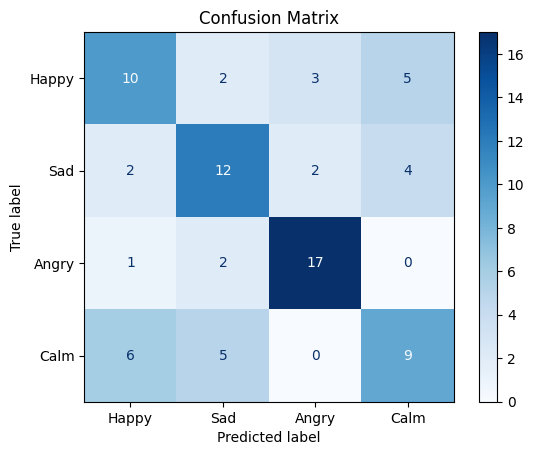

              precision    recall  f1-score   support

       Happy       0.53      0.50      0.51        20
         Sad       0.57      0.60      0.59        20
       Angry       0.77      0.85      0.81        20
        Calm       0.50      0.45      0.47        20

    accuracy                           0.60        80
   macro avg       0.59      0.60      0.60        80
weighted avg       0.59      0.60      0.60        80



In [ ]:
# ใช้โมเดลทำนาย (prediction) บนชุดข้อมูลทดสอบ
y_pred = model.predict(X_test)  # X_test คือข้อมูลทดสอบ
y_pred_classes = np.argmax(y_pred, axis=1)  # เปลี่ยนผลลัพธ์จาก one-hot เป็นคลาส
y_true = np.argmax(y_test, axis=1)  # y_test คือผลเฉลย (ground truth)

# สร้าง Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# แสดง Confusion Matrix ด้วย Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Happy', 'Sad', 'Angry', 'Calm'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# สรุปผลการวิเคราะห์
print(classification_report(y_true, y_pred_classes, target_names=['Happy', 'Sad', 'Angry', 'Calm']))

In [ ]:
# Save the trained model
model.save('Mel_Spectrogram_model.h5')

MFCC

In [ ]:
# กำหนดพารามิเตอร์
classes = ['Happy', 'Sad', 'Angry', 'Calm']
num_classes = len(classes)
data_path = 'MFCC'

In [ ]:
# โหลดข้อมูลและเตรียมตัวแปร
X, y = [], []
for idx, emotion in enumerate(classes):
    emotion_path = os.path.join(data_path, emotion)
    for file in os.listdir(emotion_path):
        file_path = os.path.join(emotion_path, file)
        if file_path.endswith(('.png')):  # ตรวจสอบเฉพาะไฟล์ภาพ
            img = Image.open(file_path).convert('RGB').resize((969, 370)) # อ่านภาพและแปลงเป็น grayscale
            X.append(np.array(img))  # เพิ่มภาพใน X
            y.append(idx)  # เก็บ label

In [ ]:
# แปลงข้อมูลเป็น numpy array
X = np.array(X, dtype='float32')
X = X / 255.0  # Normalize ค่า pixel ให้อยู่ในช่วง [0, 1]
X = X[..., np.newaxis]  # เพิ่มมิติสำหรับ CNN
y = to_categorical(np.array(y), num_classes)

In [ ]:
# แบ่งข้อมูลสำหรับ Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)

(320, 370, 969, 3, 1)


In [ ]:
# โหลด VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(370, 969, 3))
base_model.trainable = False  # Freeze base model layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    # Dropout(0.5),
    Dense(4, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 11, 30, 512)         │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_9           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,868 (56.38 MB)

 Trainable params: 66,180 (258.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - accuracy: 0.2748 - loss: 1.4264 - val_accuracy: 0.2500 - val_loss: 1.3912 - learning_rate: 1.0000e-04
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.2592 - loss: 1.3770 - val_accuracy: 0.4500 - val_loss: 1.3612 - learning_rate: 1.0000e-04
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.4197 - loss: 1.3528 - val_accuracy: 0.4500 - val_loss: 1.3489 - learning_rate: 1.0000e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.4285 - loss: 1.3471 - val_accuracy: 0.5000 - val_loss: 1.3412 - learning_rate: 1.0000e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.4647 - loss: 1.3404 - val_accuracy: 0.5250 - val_loss: 1.3341 - learning_rate: 1.0000e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.4801 - loss: 1.3387 - val_accuracy: 0.5500 - val_loss: 1.3274 - learning_rate: 1.0000e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy:

In [ ]:
# ฟังก์ชันสำหรับแสดงกราฟ Accuracy
def plot_accuracy(history):
    h1 = go.Scatter(
        y=history.history['accuracy'],
        mode="lines",
        line=dict(width=2, color='blue'),
        name="Train Accuracy"
    )

    h2 = go.Scatter(
        y=history.history['val_accuracy'],
        mode="lines",
        line=dict(width=2, color='red'),
        name="Validation Accuracy"
    )

    data = [h1, h2]
    layout = go.Layout(
        title='Accuracy',
        xaxis=dict(title='Epochs'),
        yaxis=dict(title='Accuracy')
    )
    fig = go.Figure(data=data, layout=layout)
    fig.show()

plot_accuracy(history)

In [ ]:
# ฟังก์ชันสำหรับแสดงกราฟ Loss
def plot_loss(history):
    h3 = go.Scatter(
        y=history.history['loss'],
        mode="lines",
        line=dict(width=2, color='blue'),
        name="Train Loss"
    )

    h4 = go.Scatter(
        y=history.history['val_loss'],
        mode="lines",
        line=dict(width=2, color='red'),
        name="Validation Loss"
    )

    data_loss = [h3, h4]
    layout_loss = go.Layout(
        title='Loss',
        xaxis=dict(title='Epochs'),
        yaxis=dict(title='Loss')
    )
    fig_loss = go.Figure(data=data_loss, layout=layout_loss)
    fig_loss.show()

plot_loss(history)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


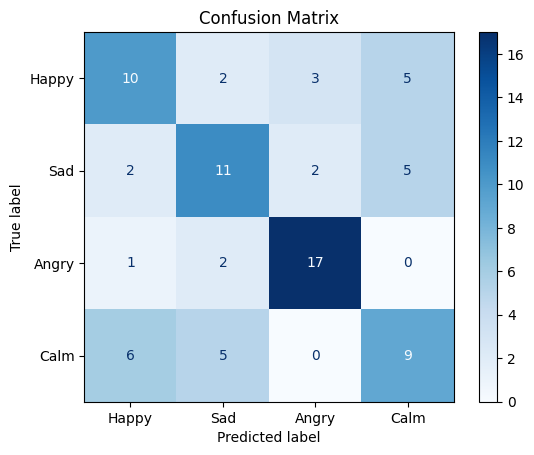

              precision    recall  f1-score   support

       Happy       0.53      0.50      0.51        20
         Sad       0.55      0.55      0.55        20
       Angry       0.77      0.85      0.81        20
        Calm       0.47      0.45      0.46        20

    accuracy                           0.59        80
   macro avg       0.58      0.59      0.58        80
weighted avg       0.58      0.59      0.58        80



In [ ]:
# ใช้โมเดลทำนาย (prediction) บนชุดข้อมูลทดสอบ
y_pred = model.predict(X_test)  # X_test คือข้อมูลทดสอบ
y_pred_classes = np.argmax(y_pred, axis=1)  # เปลี่ยนผลลัพธ์จาก one-hot เป็นคลาส
y_true = np.argmax(y_test, axis=1)  # y_test คือผลเฉลย (ground truth)

# สร้าง Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# แสดง Confusion Matrix ด้วย Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Happy', 'Sad', 'Angry', 'Calm'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# สรุปผลการวิเคราะห์
print(classification_report(y_true, y_pred_classes, target_names=['Happy', 'Sad', 'Angry', 'Calm']))

In [ ]:
# Save the trained model
model.save('MFCC_model.h5')

Chromagram

In [ ]:
# กำหนดพารามิเตอร์
classes = ['Happy', 'Sad', 'Angry', 'Calm']
num_classes = len(classes)
data_path = 'Chromagram'

In [ ]:
# โหลดข้อมูลและเตรียมตัวแปร
X, y = [], []
for idx, emotion in enumerate(classes):
    emotion_path = os.path.join(data_path, emotion)
    for file in os.listdir(emotion_path):
        file_path = os.path.join(emotion_path, file)
        if file_path.endswith(('.png')):  # ตรวจสอบเฉพาะไฟล์ภาพ
            img = Image.open(file_path).convert('RGB').resize((969, 370)) # อ่านภาพและแปลงเป็น grayscale
            X.append(np.array(img))  # เพิ่มภาพใน X
            y.append(idx)  # เก็บ label

In [ ]:
# แปลงข้อมูลเป็น numpy array
X = np.array(X, dtype='float32')
X = X / 255.0  # Normalize ค่า pixel ให้อยู่ในช่วง [0, 1]
X = X[..., np.newaxis]  # เพิ่มมิติสำหรับ CNN
y = to_categorical(np.array(y), num_classes)

In [ ]:
# แบ่งข้อมูลสำหรับ Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)

(320, 370, 969, 3, 1)


In [ ]:
# โหลด VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(370, 969, 3))
base_model.trainable = False  # Freeze base model layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    # Dropout(0.5),
    Dense(4, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 11, 30, 512)         │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_12          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,868 (56.38 MB)

 Trainable params: 66,180 (258.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping]
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.2943 - loss: 1.4101 - val_accuracy: 0.2500 - val_loss: 1.3987
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.2906 - loss: 1.3783 - val_accuracy: 0.2625 - val_loss: 1.3834
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.2692 - loss: 1.3745 - val_accuracy: 0.2750 - val_loss: 1.3777
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.2455 - loss: 1.3739 - val_accuracy: 0.3500 - val_loss: 1.3728
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.3305 - loss: 1.3666 - val_accuracy: 0.3375 - val_loss: 1.3682
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3371 - loss: 1.3628 - val_accuracy: 0.3625 - val_loss: 1.3640
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.3984 - loss: 1.3538 - val_accuracy: 0.3500 - val_loss: 1.3600
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.4147 - loss: 1.3507 - val_accuracy: 0

In [ ]:
# ฟังก์ชันสำหรับแสดงกราฟ Accuracy
def plot_accuracy(history):
    h1 = go.Scatter(
        y=history.history['accuracy'],
        mode="lines",
        line=dict(width=2, color='blue'),
        name="Train Accuracy"
    )

    h2 = go.Scatter(
        y=history.history['val_accuracy'],
        mode="lines",
        line=dict(width=2, color='red'),
        name="Validation Accuracy"
    )

    data = [h1, h2]
    layout = go.Layout(
        title='Accuracy',
        xaxis=dict(title='Epochs'),
        yaxis=dict(title='Accuracy')
    )
    fig = go.Figure(data=data, layout=layout)
    fig.show()

plot_accuracy(history)

In [ ]:
# ฟังก์ชันสำหรับแสดงกราฟ Loss
def plot_loss(history):
    h3 = go.Scatter(
        y=history.history['loss'],
        mode="lines",
        line=dict(width=2, color='blue'),
        name="Train Loss"
    )

    h4 = go.Scatter(
        y=history.history['val_loss'],
        mode="lines",
        line=dict(width=2, color='red'),
        name="Validation Loss"
    )

    data_loss = [h3, h4]
    layout_loss = go.Layout(
        title='Loss',
        xaxis=dict(title='Epochs'),
        yaxis=dict(title='Loss')
    )
    fig_loss = go.Figure(data=data_loss, layout=layout_loss)
    fig_loss.show()

plot_loss(history)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


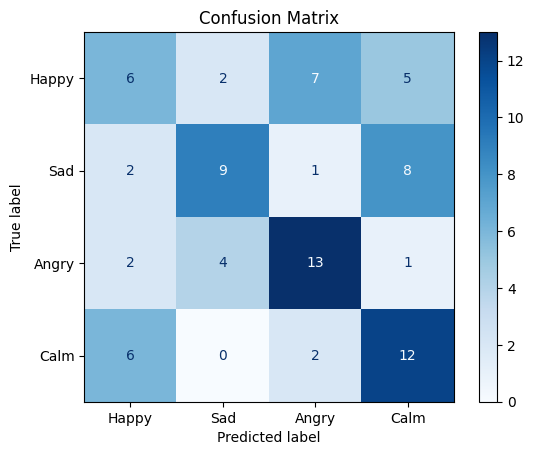

              precision    recall  f1-score   support

       Happy       0.38      0.30      0.33        20
         Sad       0.60      0.45      0.51        20
       Angry       0.57      0.65      0.60        20
        Calm       0.46      0.60      0.52        20

    accuracy                           0.50        80
   macro avg       0.50      0.50      0.49        80
weighted avg       0.50      0.50      0.49        80



In [ ]:
# ใช้โมเดลทำนาย (prediction) บนชุดข้อมูลทดสอบ
y_pred = model.predict(X_test)  # X_test คือข้อมูลทดสอบ
y_pred_classes = np.argmax(y_pred, axis=1)  # เปลี่ยนผลลัพธ์จาก one-hot เป็นคลาส
y_true = np.argmax(y_test, axis=1)  # y_test คือผลเฉลย (ground truth)

# สร้าง Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# แสดง Confusion Matrix ด้วย Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Happy', 'Sad', 'Angry', 'Calm'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# สรุปผลการวิเคราะห์
print(classification_report(y_true, y_pred_classes, target_names=['Happy', 'Sad', 'Angry', 'Calm']))

In [ ]:
# Save the trained model
model.save('Chromagram_model.h5')